Found 148 arguments in the file


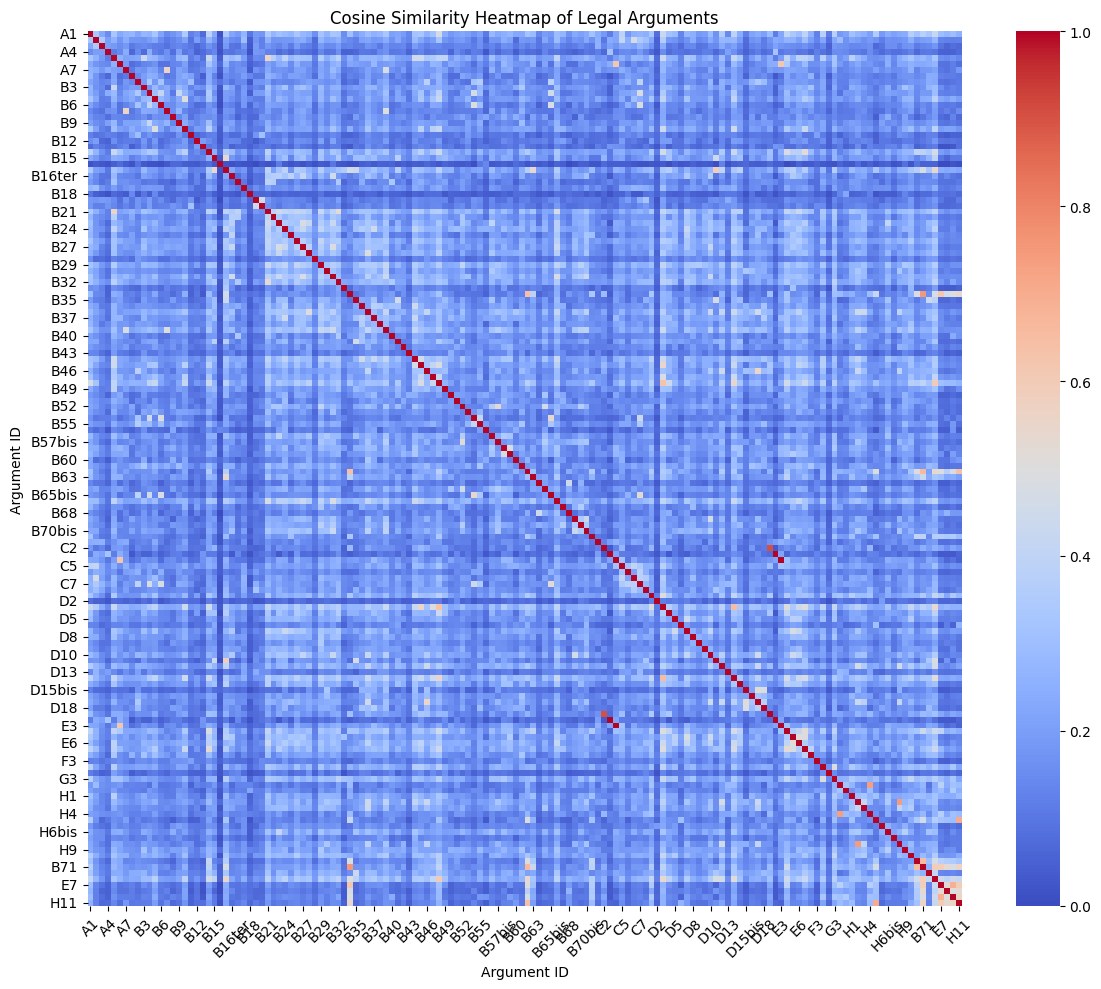

In [4]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Function to read and parse the XML file
def parse_xml_file(file_path):
    try:
        # Try to parse the file directly
        tree = ET.parse(file_path)
        root = tree.getroot()
    except ET.ParseError:
        # If the XML doesn't have a single root element, add a wrapper
        with open(file_path, 'r', encoding='utf-8') as file:
            xml_content = file.read()
        root = ET.fromstring(f'<root>{xml_content}</root>')
    return root

# Extract arguments from XML
def extract_arguments(root):
    arguments = []
    
    # Find all premise and conclusion elements
    for element_type in ['prem', 'conc']:
        for elem in root.findall(f'.//{element_type}'):
            if elem.text:  # Ensure there's text content
                arg_id = elem.attrib.get('ID')
                text = elem.text.strip()
                arg_type = 'Premise' if element_type == 'prem' else 'Conclusion'
                
                # Extract support and attack information
                supports = elem.attrib.get('SUP', '').split('|') if 'SUP' in elem.attrib else []
                attacks = elem.attrib.get('ATT', '').split('|') if 'ATT' in elem.attrib else []
                
                # Remove empty strings from supports and attacks
                supports = [s for s in supports if s]
                attacks = [a for a in attacks if a]
                
                arguments.append({
                    'ID': arg_id,
                    'Text': text,
                    'Type': arg_type,
                    'Supports': supports,
                    'Attacks': attacks
                })
                
    return arguments

# Main function
def generate_cosine_similarity_heatmap(file_path):
    # Parse XML and extract arguments
    root = parse_xml_file(file_path)
    arguments = extract_arguments(root)
    
    # Convert to DataFrame
    arguments_df = pd.DataFrame(arguments)
    
    # Print some information about the arguments
    print(f"Found {len(arguments_df)} arguments in the file")
    
    if arguments_df.empty:
        print("No arguments found in the XML file.")
        return
    
    # Compute TF-IDF vectors for argument texts
    texts = arguments_df['Text'].tolist()
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    # Compute cosine similarity matrix
    cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Convert to DataFrame for better visualization
    cosine_sim_df = pd.DataFrame(
        cosine_sim_matrix, 
        index=arguments_df['ID'], 
        columns=arguments_df['ID']
    )
    
    # Plotting the heatmap without annotations (numbers)
    plt.figure(figsize=(12, 10))
    
    sns.heatmap(
        cosine_sim_df,
        annot=False,  # Disable annotations (numbers)
        cmap="coolwarm",
        cbar=True,
        vmin=0,
        vmax=1
    )
    
    plt.title("Cosine Similarity Heatmap of Legal Arguments")
    plt.xlabel("Argument ID")
    plt.ylabel("Argument ID")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig("argument_similarity_heatmap_no_numbers.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    return cosine_sim_df

if __name__ == "__main__":
    # Execute the main function with the XML file path
    similarity_matrix = generate_cosine_similarity_heatmap("R2021_Prosegur Compañía de Seguridad SA, established in Madrid (Spain) v Commission.xml")


Found 148 arguments in the file
Arguments sorted by relationship:
Supporting first: ['A2', 'A3', 'A6', 'A8', 'B14', 'B19', 'B2', 'B27', 'B29', 'B3', 'B31', 'B32', 'B37', 'B48', 'B5', 'B50', 'B54', 'B55', 'B58', 'B7', 'B70', 'C6', 'C9', 'D11', 'E1', 'E3', 'F3', 'G3', 'G6', 'H10', 'H11', 'B16bis', 'B33', 'B34', 'B39', 'B40', 'B56', 'B59', 'B62', 'B64', 'B66', 'B68', 'B71', 'C1', 'C4', 'D15bis', 'D19', 'D3', 'D4', 'E7', 'F4', 'H4', 'H5']
Attacking next: ['B16bis', 'B64', 'C1', 'D1', 'D15bis', 'D4', 'B15', 'B35', 'B35bis', 'B41', 'B43', 'B63', 'E4', 'F1', 'H1']
No relation last: ['57bis', 'A1', 'A4', 'A5', 'A7', 'B1', 'B10', 'B11', 'B12', 'B13', 'B16quater', 'B16ter', 'B17', 'B18', 'B20', 'B24', 'B25', 'B26', 'B27bis', 'B28', 'B30', 'B36', 'B38', 'B4', 'B44', 'B45', 'B46', 'B47', 'B49', 'B51', 'B52', 'B53', 'B57', 'B6', 'B60', 'B61', 'B65', 'B65bis', 'B67', 'B69', 'B70bis', 'B8', 'B9', 'C1bis', 'C3', 'C5', 'C5bis', 'C7', 'C8', 'D10', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D2', '

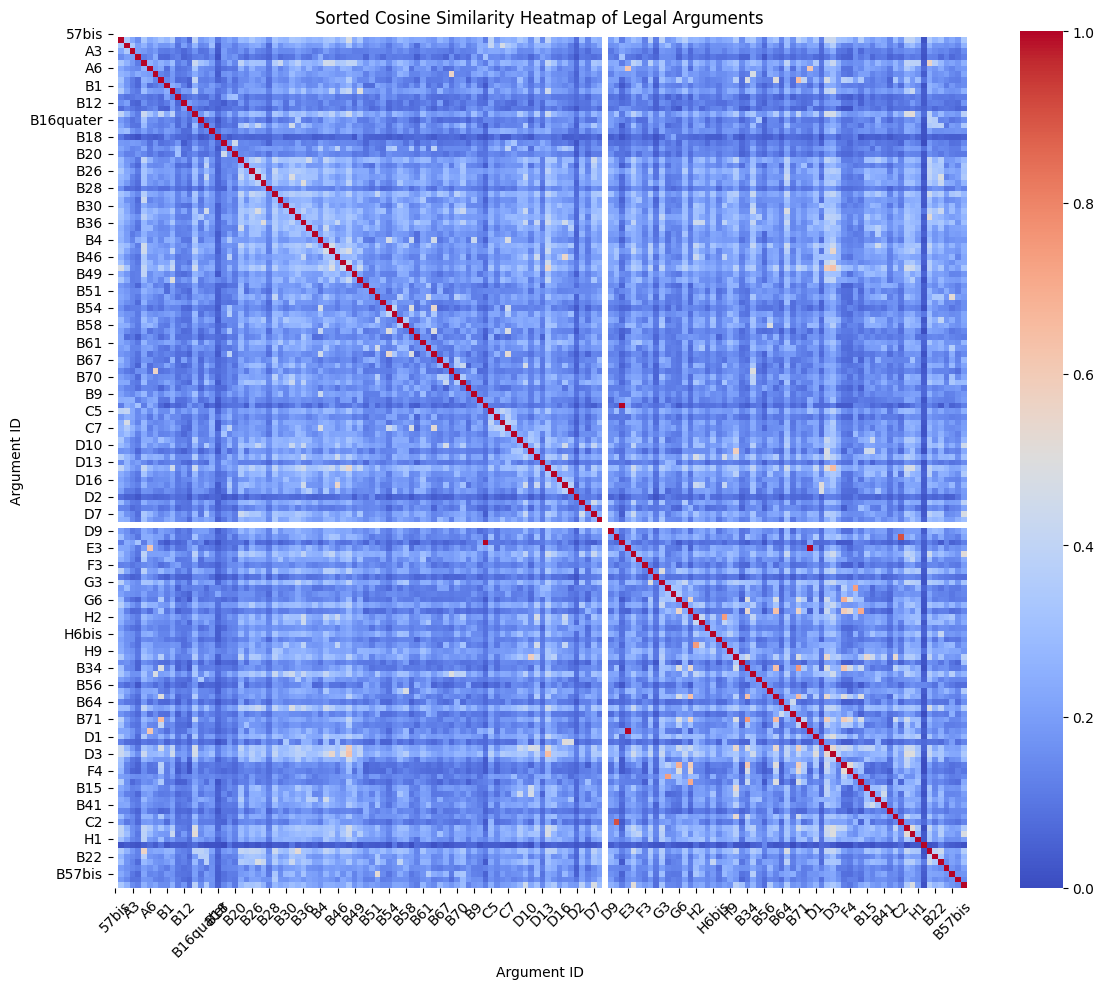

Analysis complete. Sorted heatmap saved as 'sorted_argument_similarity_heatmap.png'


In [5]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Function to read and parse the XML file
def parse_xml_file(file_path):
    try:
        tree = ET.parse(file_path)
        root = tree.getroot()
    except ET.ParseError:
        with open(file_path, 'r', encoding='utf-8') as file:
            xml_content = file.read()
        root = ET.fromstring(f'<root>{xml_content}</root>')
    return root

# Extract arguments from XML
def extract_arguments(root):
    arguments = []
    
    for element_type in ['prem', 'conc']:
        for elem in root.findall(f'.//{element_type}'):
            if elem.text:  # Ensure there's text content
                arg_id = elem.attrib.get('ID')
                text = elem.text.strip()
                arg_type = 'Premise' if element_type == 'prem' else 'Conclusion'
                
                # Extract support and attack information
                supports = elem.attrib.get('SUP', '').split('|') if 'SUP' in elem.attrib else []
                attacks = elem.attrib.get('ATT', '').split('|') if 'ATT' in elem.attrib else []
                
                # Remove empty strings from supports and attacks
                supports = [s for s in supports if s]
                attacks = [a for a in attacks if a]
                
                arguments.append({
                    'ID': arg_id,
                    'Text': text,
                    'Type': arg_type,
                    'Supports': supports,
                    'Attacks': attacks
                })
                
    return arguments

# Function to sort arguments by their relationship types
def sort_arguments_by_relationship(arguments_df):
    # Create sets to track arguments by relationship type
    supporting_args = set()
    attacking_args = set()
    
    # Identify arguments with support or attack relationships
    for _, row in arguments_df.iterrows():
        arg_id = row['ID']
        
        # If this argument supports others or is supported by others
        if row['Supports']:
            supporting_args.add(arg_id)
            supporting_args.update(row['Supports'])
            
        # If this argument attacks others or is attacked by others
        if row['Attacks']:
            attacking_args.add(arg_id)
            attacking_args.update(row['Attacks'])
    
    # Find arguments in both categories
    mixed_args = supporting_args.intersection(attacking_args)
    
    # Remove mixed args from individual categories
    supporting_only = supporting_args - mixed_args
    attacking_only = attacking_args - mixed_args
    
    # Arguments with no relationships
    all_args = set(arguments_df['ID'])
    related_args = supporting_args.union(attacking_args)
    no_relation_args = all_args - related_args
    
    # Create the final sorted list
    sorted_args = []
    sorted_args.extend(sorted(list(supporting_only)))  # Support relationships at top
    sorted_args.extend(sorted(list(mixed_args)))       # Mixed relationships next
    sorted_args.extend(sorted(list(attacking_only)))   # Attack relationships in middle
    sorted_args.extend(sorted(list(no_relation_args))) # No relationships at bottom
    
    return sorted_args

# Main function
def generate_sorted_similarity_heatmap(file_path):
    # Parse XML and extract arguments
    root = parse_xml_file(file_path)
    arguments = extract_arguments(root)
    
    # Convert to DataFrame
    arguments_df = pd.DataFrame(arguments)
    
    print(f"Found {len(arguments_df)} arguments in the file")
    
    if arguments_df.empty:
        print("No arguments found in the XML file.")
        return
    
    # Compute TF-IDF vectors for argument texts
    texts = arguments_df['Text'].tolist()
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    
    # Compute cosine similarity matrix
    cosine_sim_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
    
    # Create DataFrame with original order
    orig_sim_df = pd.DataFrame(
        cosine_sim_matrix, 
        index=arguments_df['ID'], 
        columns=arguments_df['ID']
    )
    
    # Get sorted argument order
    sorted_args = sort_arguments_by_relationship(arguments_df)
    print("Arguments sorted by relationship:")
    print("Supporting first:", [arg for arg in sorted_args if arg in sorted(list(set(arguments_df[arguments_df['Supports'].apply(len) > 0]['ID'])))])
    print("Attacking next:", [arg for arg in sorted_args if arg in sorted(list(set(arguments_df[arguments_df['Attacks'].apply(len) > 0]['ID'])))])
    print("No relation last:", [arg for arg in sorted_args if arg not in sorted(list(set(arguments_df[arguments_df['Supports'].apply(len) > 0]['ID']))) and arg not in sorted(list(set(arguments_df[arguments_df['Attacks'].apply(len) > 0]['ID'])))])
    
    # Reindex the similarity matrix with sorted order
    sorted_sim_df = orig_sim_df.reindex(index=sorted_args, columns=sorted_args)
    
    # Plotting the sorted heatmap
    plt.figure(figsize=(12, 10))
    
    sns.heatmap(
        sorted_sim_df,
        annot=False,  # No annotations as requested
        cmap="coolwarm",
        cbar=True,
        vmin=0,
        vmax=1
    )
    
    plt.title("Sorted Cosine Similarity Heatmap of Legal Arguments")
    plt.xlabel("Argument ID")
    plt.ylabel("Argument ID")
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig("sorted_argument_similarity_heatmap.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    return sorted_sim_df

if __name__ == "__main__":
    similarity_matrix = generate_sorted_similarity_heatmap("R2021_Prosegur Compañía de Seguridad SA, established in Madrid (Spain) v Commission.xml")
    print("Analysis complete. Sorted heatmap saved as 'sorted_argument_similarity_heatmap.png'")


Found 148 arguments in the file


2025-04-14 12:37:39.128118: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-14 12:37:39.277425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744614459.344172  238056 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744614459.362276  238056 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744614459.479617  238056 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

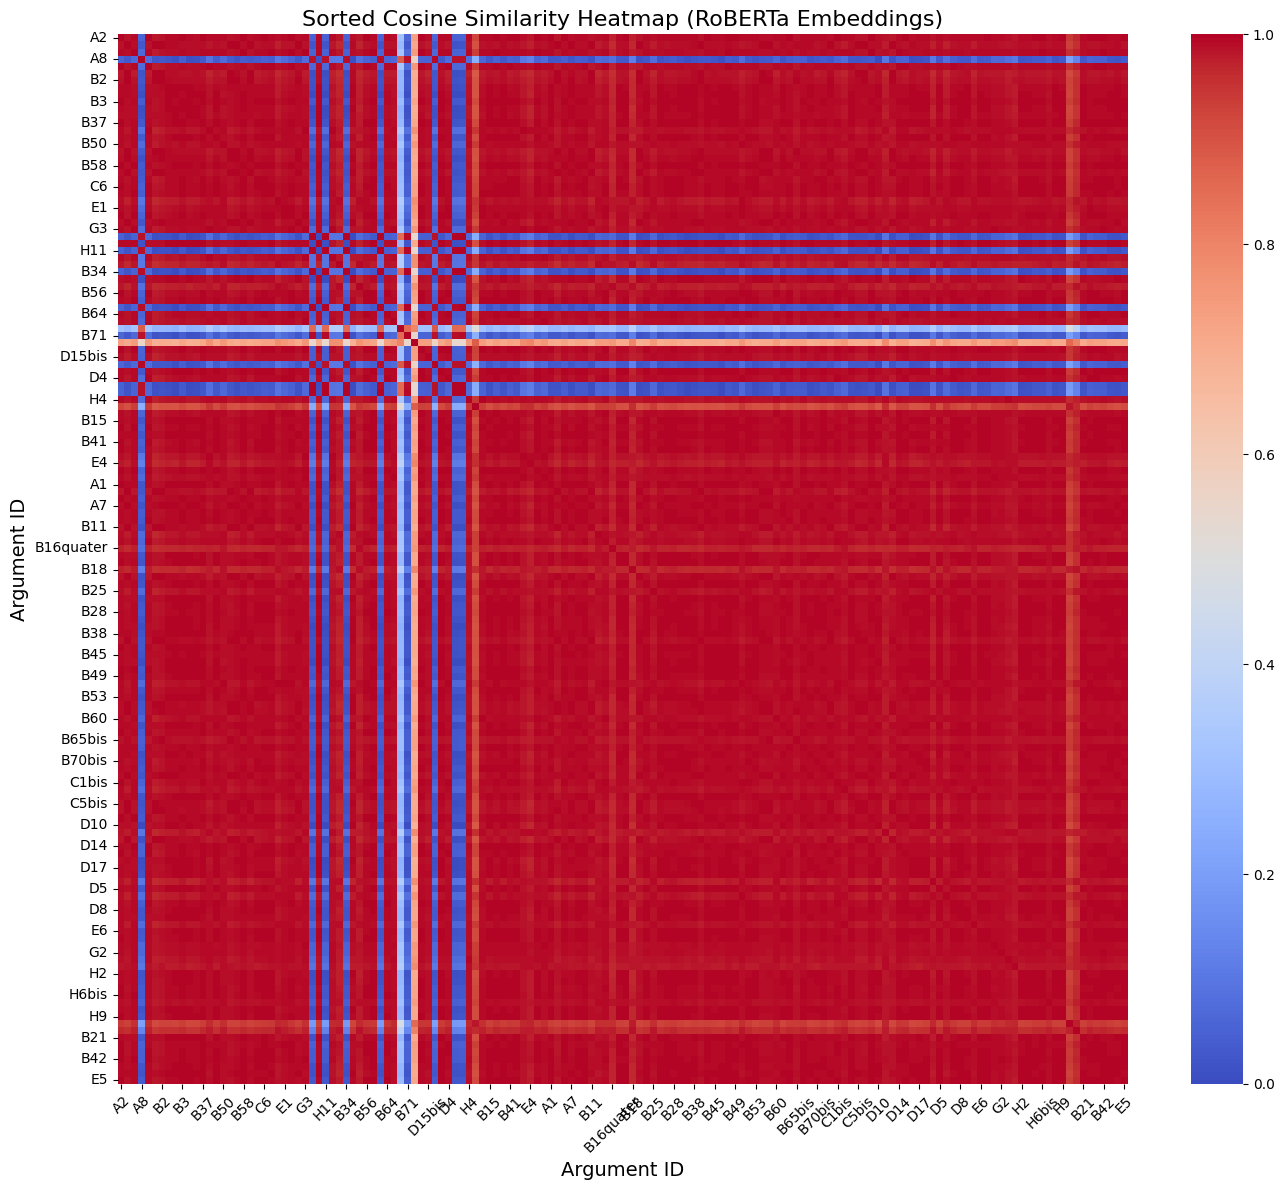

Analysis complete. Sorted heatmap saved as 'roberta_sorted_argument_similarity_heatmap.png'


In [7]:
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

# Function to read and parse the XML file
def parse_xml_file(file_path):
    try:
        tree = ET.parse(file_path)
        root = tree.getroot()
    except ET.ParseError:
        with open(file_path, 'r', encoding='utf-8') as file:
            xml_content = file.read()
        root = ET.fromstring(f'<root>{xml_content}</root>')
    return root

# Extract arguments from XML
def extract_arguments(root):
    arguments = []
    
    for element_type in ['prem', 'conc']:
        for elem in root.findall(f'.//{element_type}'):
            if elem.text:  # Ensure there's text content
                arg_id = elem.attrib.get('ID')
                text = elem.text.strip()
                arg_type = 'Premise' if element_type == 'prem' else 'Conclusion'
                
                # Extract support and attack information
                supports = elem.attrib.get('SUP', '').split('|') if 'SUP' in elem.attrib else []
                attacks = elem.attrib.get('ATT', '').split('|') if 'ATT' in elem.attrib else []
                
                # Remove empty strings from supports and attacks
                supports = [s for s in supports if s]
                attacks = [a for a in attacks if a]
                
                arguments.append({
                    'ID': arg_id,
                    'Text': text,
                    'Type': arg_type,
                    'Supports': supports,
                    'Attacks': attacks
                })
                
    return arguments

# Function to get embeddings from RoBERTa model using mean pooling
def get_roberta_embeddings(texts, model_path):
    # Load the RoBERTa model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModel.from_pretrained(model_path)
    
    # Set model to evaluation mode
    model.eval()
    
    # Initialize a list to store embeddings
    embeddings = []
    
    # Process texts in batches to avoid memory issues
    batch_size = 8
    
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        
        # Tokenize and prepare input
        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
        
        # Get embeddings
        with torch.no_grad():
            outputs = model(**inputs)
            
            # Mean pooling - take the mean of all token embeddings
            attention_mask = inputs['attention_mask']
            token_embeddings = outputs.last_hidden_state
            
            # Expand attention mask to match token embeddings shape
            input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
            
            # Sum the embeddings weighted by attention mask
            sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
            
            # Divide by sum of attention mask to get mean
            sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
            batch_embeddings = sum_embeddings / sum_mask
            
            # Add to list of embeddings
            for emb in batch_embeddings:
                embeddings.append(emb.numpy())
    
    # Convert to numpy array
    return np.array(embeddings)

# Main function to generate the heatmap with predefined order
def generate_sorted_similarity_heatmap(file_path, model_path, predefined_order):
    # Parse XML and extract arguments
    root = parse_xml_file(file_path)
    arguments = extract_arguments(root)
    
    # Convert to DataFrame
    arguments_df = pd.DataFrame(arguments)
    
    print(f"Found {len(arguments_df)} arguments in the file")
    
    if arguments_df.empty:
        print("No arguments found in the XML file.")
        return
    
    # Get embeddings using RoBERTa model instead of TF-IDF
    texts = arguments_df['Text'].tolist()
    embeddings = get_roberta_embeddings(texts, model_path)
    
    # Compute cosine similarity matrix
    cosine_sim_matrix = cosine_similarity(embeddings, embeddings)
    
    # Create DataFrame with original order
    orig_sim_df = pd.DataFrame(
        cosine_sim_matrix, 
        index=arguments_df['ID'], 
        columns=arguments_df['ID']
    )
    
    # Remove duplicates from predefined order while preserving the order
    seen = set()
    sorted_args = [x for x in predefined_order if not (x in seen or seen.add(x))]
    
    # Filter sorted_args to include only argument IDs that exist in the DataFrame
    sorted_args = [arg for arg in sorted_args if arg in orig_sim_df.index]
    
    # Reindex the similarity matrix with sorted order
    sorted_sim_df = orig_sim_df.reindex(index=sorted_args, columns=sorted_args)
    
    # Plotting the sorted heatmap
    plt.figure(figsize=(14, 12))
    
    sns.heatmap(
        sorted_sim_df,
        annot=False,  # No annotations as requested
        cmap="coolwarm",
        cbar=True,
        vmin=0,
        vmax=1
    )
    
    plt.title("Sorted Cosine Similarity Heatmap (RoBERTa Embeddings)", fontsize=16)
    plt.xlabel("Argument ID", fontsize=14)
    plt.ylabel("Argument ID", fontsize=14)
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(rotation=0, fontsize=10)
    plt.tight_layout()
    plt.savefig("roberta_sorted_argument_similarity_heatmap.png", dpi=300, bbox_inches="tight")
    plt.show()
    
    return sorted_sim_df

if __name__ == "__main__":
    # Use the predefined order from the user's input
    supporting_first = ['A2', 'A3', 'A6', 'A8', 'B14', 'B19', 'B2', 'B27', 'B29', 'B3', 'B31', 'B32', 'B37', 'B48', 'B5', 'B50', 'B54', 'B55', 'B58', 'B7', 'B70', 'C6', 'C9', 'D11', 'E1', 'E3', 'F3', 'G3', 'G6', 'H10', 'H11', 'B16bis', 'B33', 'B34', 'B39', 'B40', 'B56', 'B59', 'B62', 'B64', 'B66', 'B68', 'B71', 'C1', 'C4', 'D15bis', 'D19', 'D3', 'D4', 'E7', 'F4', 'H4', 'H5']
    attacking_next = ['B16bis', 'B64', 'C1', 'D1', 'D15bis', 'D4', 'B15', 'B35', 'B35bis', 'B41', 'B43', 'B63', 'E4', 'F1', 'H1']
    no_relation_last = ['57bis', 'A1', 'A4', 'A5', 'A7', 'B1', 'B10', 'B11', 'B12', 'B13', 'B16quater', 'B16ter', 'B17', 'B18', 'B20', 'B24', 'B25', 'B26', 'B27bis', 'B28', 'B30', 'B36', 'B38', 'B4', 'B44', 'B45', 'B46', 'B47', 'B49', 'B51', 'B52', 'B53', 'B57', 'B6', 'B60', 'B61', 'B65', 'B65bis', 'B67', 'B69', 'B70bis', 'B8', 'B9', 'C1bis', 'C3', 'C5', 'C5bis', 'C7', 'C8', 'D10', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D2', 'D5', 'D6', 'D7', 'D8', 'D8bis', 'D9', 'E2', 'E6', 'F2', 'G1', 'G2', 'G4', 'G5', 'H2', 'H3', 'H6', 'H6bis', 'H7', 'H8', 'H9', 'C2', 'B16', 'B21', 'B22', 'B23', 'B42', 'B57bis', 'B8bis', 'E5']
    
    # Combine all categories in the requested order
    predefined_order = supporting_first + attacking_next + no_relation_last
    
    # Generate the heatmap
    similarity_matrix = generate_sorted_similarity_heatmap("R2021_Prosegur Compañía de Seguridad SA, established in Madrid (Spain) v Commission.xml", "RoBERTa_prem_conc_finetuned", predefined_order)
    print("Analysis complete. Sorted heatmap saved as 'roberta_sorted_argument_similarity_heatmap.png'")
